In [3]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Input
from keras.models import Model,Sequential
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import io
import os
from keras.preprocessing.image import img_to_array,load_img
from keras.applications import VGG16
from keras.optimizers import Adam
import random
import imutils

ModuleNotFoundError: No module named 'tf'

In [ ]:
from google.colab import files
uploaded= files.upload()

file=pd.read_csv(io.BytesIO(uploaded['annotations.csv']))
print(file)


In [ ]:
from google.colab import files
uploaded=files.upload()

image_folder=io.BytesIO(uploaded['images.zip'])

Saving images.zip to images.zip


In [ ]:
!unzip images.zip

In [ ]:
data=[]
target=[]
filename=[]
images_folder_path="/content/images/"


In [ ]:
for index,rows in file.iterrows():
  filen,start_x,start_y,end_x,end_y=rows["image_name"],rows["x1"],rows["y1"],rows["x2"],rows["y2"]
  
  filename.append(filen)

  image_path=images_folder_path+filen
  image=cv2.imread(image_path)
  h,w=image.shape[:2]
  
  start_x=start_x/w
  start_y=start_y/h
  end_x=end_x/w
  end_y=end_y/h

  image=load_img(image_path,target_size=(224,224))
  image=img_to_array(image)

  data.append(image)
  target.append((start_x,start_y,end_x,end_y))

In [ ]:
data=np.array(data,dtype="float32")/255.0
targets=np.array(target,dtype="float32")

train_images,test_images,train_targets,test_targets=train_test_split(data,targets,test_size=0.1,random_state=2020)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(4,activation="sigmoid"))


opt=Adam(lr=0.0001)
model.compile(loss="mse",optimizer=opt)

print(model.summary())

In [ ]:
#transfer learning
#vgg=VGG16(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
#vgg.trainable=False
#flatten=vgg.output
#flatten=Flatten()(flatten)
#bb=Dense(256,activation="relu")(flatten)
#bb=Dense(128,activation="relu")(bb)
#bb=Dense(64,activation="relu")(bb)
#bb=Dense(32,activation="relu")(bb)
#bb=Dense(4,activation="sigmoid")(bb)

#model=Model(inputs=vgg.input,outputs=bb)

#opt=Adam(lr=0.0001)
#model.compile(loss="mse",optimizer=opt)

#print(model.summary())

In [ ]:
model.fit(train_images,train_targets,validation_data=(test_images,test_targets),batch_size=16,epochs=10,verbose=1)


Epoch 1/10
45/45 [==============================] - 4s 96ms/step - loss: 0.0282 - val_loss: 0.0102
Epoch 2/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0127 - val_loss: 0.0095
Epoch 3/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0120 - val_loss: 0.0090
Epoch 4/10
45/45 [==============================] - 4s 95ms/step - loss: 0.0115 - val_loss: 0.0096
Epoch 5/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0115 - val_loss: 0.0090
Epoch 6/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0117 - val_loss: 0.0086
Epoch 7/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 8/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0106 - val_loss: 0.0084
Epoch 9/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0105 - val_loss: 0.0086
Epoch 10/10
45/45 [==============================] - 4s 94ms/step - loss: 0.0101 - val_loss: 0.0084


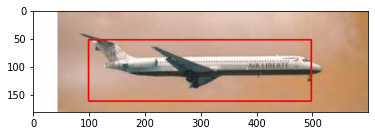

In [ ]:
# Testing on single image
test_image_path=images_folder_path+random.choice(filename)
test_image=load_img(test_image_path,target_size=(224,224))
test_image=np.array(test_image)/255
test_image=np.expand_dims(test_image,axis=0)

prediction=model.predict(test_image)[0]
(startX,startY,endX,endY)=prediction

test_img=cv2.imread(test_image_path)
test_img=imutils.resize(test_img,width=600)
(h,w)=test_img.shape[:2]

startX=int(startX*w)
startY=int(startY*h)
endX=int(endX*w)
endY=int(endY*h)

cv2.rectangle(test_img,(startX,startY),(endX,endY),(255,0,0),2)
plt.imshow(test_img)



# New Section